## Item K-E analisys

In [116]:
def init_kaggle(run_on_kaggle, secret_name):
    if run_on_kaggle:
        from kaggle_secrets import UserSecretsClient
        user_secrets = UserSecretsClient()
        personal_token = user_secrets.get_secret(secret_name)
        
        import subprocess
        subprocess.run(["git", "clone", "https://" + personal_token + "@github.com/alecontuIT/rec_sys_challenge2022.git"])
        
        import os
        os.chdir("./rec_sys_challenge2022")
        
        subprocess.run(["pip", "install", "-r", "requirements.txt"])
        subprocess.run(["python", "run_compile_all_cython.py"])
        return True
    
    else:
        return False
    
    
kaggle = init_kaggle(False, "recsys_git_token")

In [117]:
import utils 
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

### Utils functions

In [91]:
def get_df_from_icm_type(ICM):
    coo = ICM.tocoo(copy=False)
    df = pd.DataFrame({'item_id': coo.row, 'feature_id': coo.col, 'data': coo.data}
                 )[['item_id', 'feature_id', 'data']].sort_values(['item_id', 'feature_id']
                 ).reset_index(drop=True)
    return df


def elbow_analisys(ICM_length, n):
    # Create a list to store the within-cluster sum of squares (WCSS) for each number of clusters
    wcss = []

    X = ICM_length['data'].values.reshape(-1, 1)

    # Iterate over a range of possible number of clusters
    for i in range(1, n):
        # Create a KMeans model with i clusters
        kmeans = KMeans(n_clusters=i)
        # Fit the model to the data
        kmeans.fit(X)
        # Append the WCSS for this number of clusters to the list
        wcss.append(kmeans.inertia_)

    # Plot the WCSS values against the number of clusters
    plt.plot(range(1, n), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within-cluster Sum of Squares')
    plt.show()
    
    
def clusterize_icm_length(ICM_length, k):
    X = ICM_length["data"].values.reshape(-1, 1)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    return kmeans.labels_

### Import datasets

In [94]:
ICM_type = utils.icm_types()     # sps matrix
ICM_length = utils.icm_length()  #dataframe

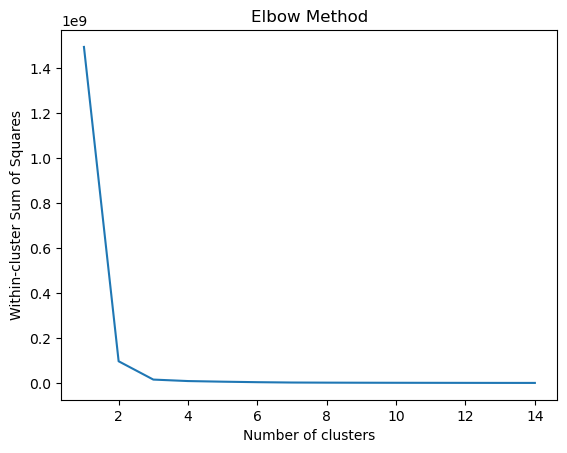

In [24]:
elbow_analisys(ICM_length, 15)

#### Looks like we need just 3 clusters, but if we do so we can notice that 2 clusters are made only by outliers (10.000 values and 1000 and more the other). The third cluster is made with all the values < 1000 and contains almost all the items:

In [56]:
k = 3
ICM_length["feature_id"] = clusterize_icm_length(ICM_length, k)

In [26]:
print("Number of items: "+str(len(ICM_length[ICM_length["feature_id"] == 0])))
ICM_length[ICM_length["feature_id"] == 0].head(10)

Number of items: 27883


,item_id,data,feature_id
0,0,1,0
1,1,1,0
2,2,21,0
3,3,1,0
4,4,1,0
5,5,1,0
6,6,1,0
7,7,1,0
8,8,1,0
9,10,3,0


In [27]:
print("Number of items: "+str(len(ICM_length[ICM_length["feature_id"] == 1])))
ICM_length[ICM_length["feature_id"] == 1].head(10)

Number of items: 14


,item_id,data,feature_id
532,656,10000,1
1110,1379,10000,1
1256,1557,10000,1
5452,6769,10000,1
5789,7192,10000,1
5975,7429,10000,1
7498,9306,10000,1
8980,11208,10000,1
13157,16436,10000,1
14274,17806,10000,1


In [63]:
print("Number of items: "+str(len(ICM_length[ICM_length["feature_id"] == 2])))
#pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', 71)
ICM_length[ICM_length["feature_id"] == 2].head(71)
 

Number of items: 71


,item_id,data,feature_id
623,768,1001,2
735,909,1001,2
1047,1300,1354,2
1187,1474,1123,2
1679,2094,1001,2
2657,3299,1001,2
2764,3425,1001,2
2835,3512,1001,2
2991,3709,1001,2
3072,3805,1001,2


#### We can see that the maximum value of the larger cluster is 534, so we can put all the values > 1000 to a closer value. In this way we can cluster them as different, but without disturb the distribution

In [29]:
ICM_length[ICM_length["feature_id"] == 0].max()

item_id       27967
data            534
feature_id        0
dtype: int64

In [89]:
ICM_length = utils.icm_length()

#ICM_length.loc[ICM_length["data"] > 600, "data"] = 600
ICM_length.drop(ICM_length[ICM_length["data"] > 590].index, inplace = True)

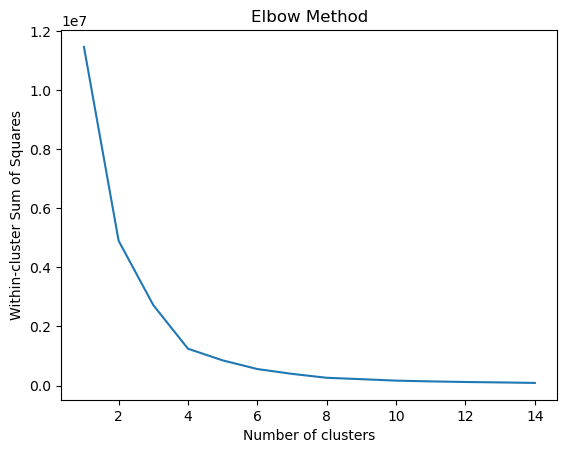

In [92]:
elbow_analisys(ICM_length, 15)

#### We can see that the elbow is changed, from 3 to 5!

In [93]:
k = 4
ICM_length["feature_id"] = clusterize_icm_length(ICM_length, k)

for i in range(0,k):
    print("Number of items: "+str(len(ICM_length[ICM_length["feature_id"] == i])))
    print(ICM_length[ICM_length["feature_id"] == i].head(10))
    print("\n - - - - -")

Number of items: 235
      item_id  data  feature_id
270       337   220           0
397       491   179           0
420       517   104           0
434       534   123           0
439       541   210           0
619       764   120           0
631       776   183           0
797       996    77           0
839      1052   202           0
1033     1284   101           0

 - - - - -
Number of items: 24439
    item_id  data  feature_id
0         0     1           1
1         1     1           1
3         3     1           1
4         4     1           1
5         5     1           1
6         6     1           1
7         7     1           1
8         8     1           1
9        10     3           1
10       11     1           1

 - - - - -
Number of items: 44
      item_id  data  feature_id
1192     1481   369           2
1244     1545   373           2
2055     2553   265           2
3019     3742   307           2
3659     4519   239           2
3823     4723   391           2
4447  

## Users K-E analisys

In [118]:
import Data_manager.split_functions.split_train_validation_random_holdout as split

train_percentage = 0.7
seed = 1234

URM = utils.urm_visualization_all_ones_summed()
URM_train, URM_validation = split.split_train_in_two_percentage_global_sample(URM, 
                                                                              train_percentage = train_percentage,
                                                                              seed=seed)

df = utils.get_df_from_urm(URM_train)

In [119]:
def elbow_analisys(URM_df, n):
    # Create a list to store the within-cluster sum of squares (WCSS) for each number of clusters
    wcss = []

    X = URM_df['Data'].values.reshape(-1, 1)

    # Iterate over a range of possible number of clusters
    for i in range(1, n):
        # Create a KMeans model with i clusters
        kmeans = KMeans(n_clusters=i)
        # Fit the model to the data
        kmeans.fit(X)
        # Append the WCSS for this number of clusters to the list
        wcss.append(kmeans.inertia_)

    # Plot the WCSS values against the number of clusters
    plt.plot(range(1, n), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within-cluster Sum of Squares')
    plt.show()
    
def clusterize_urm(URM_df, k):
    X = URM_df["Data"].values.reshape(-1, 1)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    return kmeans.labels_

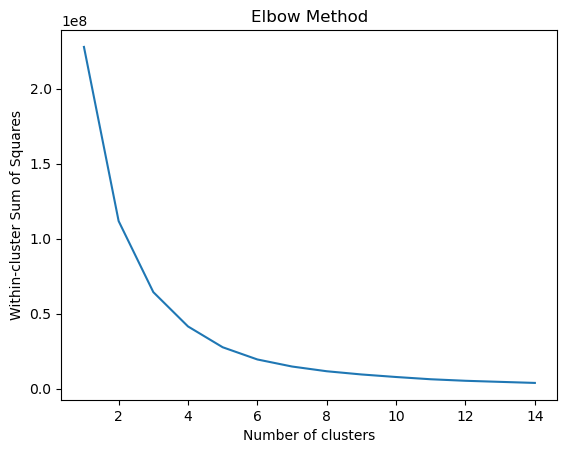

In [38]:
elbow_analisys(df, 15)

In [39]:
k = 6
df["cluster"] = clusterize_urm(df, k)

In [40]:
for i in range(0,k):
    print("Number of users: "+str(len(df[df["cluster"] == i])))
    print(df[df["cluster"] == i].head(20))
    print("\n - - - - -")

Number of users: 703803
    UserID  ItemID  Data  cluster
0        0      21   3.0        0
1        0     124   1.0        0
2        0     808   1.0        0
3        0    1326   1.0        0
4        0    1995   1.0        0
5        0    8540   1.0        0
6        0   10682   1.0        0
7        0   14305   4.0        0
8        0   18462   1.0        0
9        1    1180   1.0        0
10       1    2465   1.0        0
11       1    6186   1.0        0
12       1   10249   1.0        0
13       1   11013   1.0        0
14       1   19282   1.0        0
15       1   20372   1.0        0
16       1   20420   1.0        0
17       1   22400   1.0        0
18       2      20   1.0        0
19       2     105   2.0        0

 - - - - -
Number of users: 140
       UserID  ItemID   Data  cluster
88          4      75  491.0        1
1605       86      80  506.0        1
6831      390   10659  487.0        1
9941      572      71  991.0        1
9942      572      80  477.0        1
1

### User K-E with UCM

In [122]:
urm_visualizations = utils.urm_visualization_all_ones_summed()
urm_info = utils.urm_info_all_ones_summed()
urm_train_vis, urm_validation_vis = split.split_train_in_two_percentage_global_sample(urm_visualizations, 
                                                                                  train_percentage = train_percentage,
                                                                                 seed=seed)
urm_train_info, _ = split.split_train_in_two_percentage_global_sample(urm_info, 
                                                                                  train_percentage = train_percentage,
                                                                                 seed=seed)


In [203]:
ucm = utils.statistics_per_user(urm_train_vis, urm_train_info)
ucm

,ProfileSeen,SeenInteractionCount,ProfileInfo,InfoInteractionCount
0,9,14,43,102
1,9,9,6,6
2,35,52,49,77
3,31,60,74,209
4,20,840,13,289
...,...,...,...,...
41624,14,14,16,28
41625,14,15,3,3
41626,11,16,7,7
41627,37,108,2,2


In [204]:
def elbow_analisys(ucm, n):
    # Create a list to store the within-cluster sum of squares (WCSS) for each number of clusters
    wcss = []

    X = ucm[["ProfileSeen","SeenInteractionCount","ProfileInfo","InfoInteractionCount"]].values

    # Iterate over a range of possible number of clusters
    for i in range(1, n):
        # Create a KMeans model with i clusters
        kmeans = KMeans(n_clusters=i)
        # Fit the model to the data
        kmeans.fit(X)
        # Append the WCSS for this number of clusters to the list
        wcss.append(kmeans.inertia_)

    # Plot the WCSS values against the number of clusters
    plt.plot(range(1, n), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within-cluster Sum of Squares')
    plt.show()
    
def clusterize_urm(ucm, k):
    X = ucm[["ProfileSeen","SeenInteractionCount","ProfileInfo","InfoInteractionCount"]].values
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    return kmeans.labels_

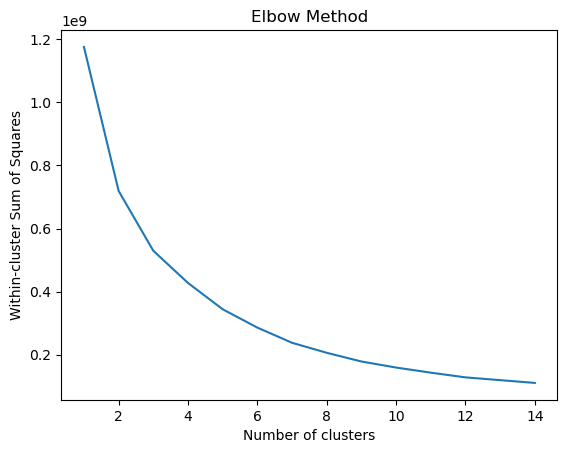

In [129]:
elbow_analisys(ucm, 15)

In [205]:
k = 8
ucm["cluster"] = clusterize_urm(ucm, k)

In [206]:
ucm

,ProfileSeen,SeenInteractionCount,ProfileInfo,InfoInteractionCount,cluster
0,9,14,43,102,3
1,9,9,6,6,3
2,35,52,49,77,3
3,31,60,74,209,0
4,20,840,13,289,5
...,...,...,...,...,...
41624,14,14,16,28,3
41625,14,15,3,3,3
41626,11,16,7,7,3
41627,37,108,2,2,6


In [199]:
ucm["user_id"] = ucm.index
user_ids = ucm["user_id"]
users_not_in_group_list = []
users_in_group_list = []

for i in range(k):
    users_in_group = ucm[ucm['cluster'] == i]
    users_in_group = users_in_group["user_id"]
    users_in_group_list.append(np.array(users_in_group))
    users_not_in_group_flag = np.isin(user_ids, users_in_group, invert=True)
    users_not_in_group = user_ids[users_not_in_group_flag]
    users_not_in_group_list.append(np.array(users_not_in_group))

In [208]:
urm = utils.urm_all_ones_summed()

In [225]:
urm_df = utils.get_df_from_urm(urm)

In [217]:
urm_df

,UserID,ItemID,Data
0,0,11,1
1,0,21,12
2,0,22,15
3,0,24,1
4,0,44,1
...,...,...,...
1554635,41628,20448,1
1554636,41628,20896,1
1554637,41628,21506,1
1554638,41628,22882,1


In [223]:
urm_df["Data"] = urm_df.groupby(["UserID", "ItemID"])["Data"].transform("sum")
urm_df.drop_duplicates(inplace=True)

In [227]:
df_copy = urm_df.copy()
df_copy.drop(columns=["ItemID"], inplace = True)
df_copy["Data"] = df_copy.groupby(["UserID"])["Data"].transform("sum")
df_copy.drop_duplicates(inplace=True)
df_copy.reset_index(inplace=True)
# Extract the data values
X = df_copy['Data'].values.reshape(-1, 1)
# Create a KMeans model with 2 clusters
kmeans = KMeans(n_clusters=k)
# Fit the model to the data
kmeans.fit(X)
# Add a new column to the DataFrame with the cluster labels
df_copy['cluster'] = kmeans.labels_
df_merged = pd.merge(urm_df[["UserID","ItemID","Data"]], df_copy[["UserID","cluster"]], on='UserID')

# Create an empty list to store the separate datasets
clustered_data = []

# Iterate through each cluster
for i in range(k):
    # Create a new dataframe for the current cluster
    cluster_df = df_merged[df_merged['cluster'] == i]
    # Save the dataframe to the list
    clustered_data.append(cluster_df)

clustered_data

[         UserID  ItemID  Data  cluster
 190           3      22    67        0
 191           3      53     1        0
 192           3      56    13        0
 193           3      60     1        0
 194           3      61     2        0
 ...         ...     ...   ...      ...
 1554181   41611   13870     1        0
 1554182   41611   15990     1        0
 1554183   41611   17821     1        0
 1554184   41611   20461     1        0
 1554185   41611   21896     1        0
 
 [228522 rows x 4 columns],
          UserID  ItemID  Data  cluster
 66            1      87     1        1
 67            1     396     2        1
 68            1    1180     1        1
 69            1    1224     1        1
 70            1    2126     1        1
 ...         ...     ...   ...      ...
 1554635   41628   20448     1        1
 1554636   41628   20896     1        1
 1554637   41628   21506     1        1
 1554638   41628   22882     1        1
 1554639   41628   23757     1        1
 
 [729485

In [228]:
df_copy["Data"] = df_copy.groupby(["UserID"])["Data"].transform("sum")

In [229]:
df_copy

,index,UserID,Data,cluster
0,0,0,157,5
1,66,1,22,1
2,87,2,238,5
3,190,3,349,0
4,317,4,1458,6
...,...,...,...,...
41624,1554482,41624,57,1
41625,1554520,41625,22,1
41626,1554541,41626,28,1
41627,1554564,41627,133,5
